#### Title: 娛樂城數據可視化報表
#### Date: 2020/ 10 / 20  
#### Period: 2020/10/9 - 2020/10/20
#### Author: Kevin Cheng

# 數據來源，每日 20:00 跟 21:30 大家回報的虧與損
##### 主要是觀察在這個平台的老師的名牌獲利狀況
##### 另外，不公平的交易不列入數據，因為不是客觀數據
##### 雖然還有一個洗碼量再干擾大家可以實際領回大家的獲利，部過在這邊先暫時不列入數據，如果列入可能會更少，因為只要你無法領出現金都不算賺到手，對吧!

In [26]:
# 載入需要的 python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# 載入大家的損益資料，並且隨意列出前 20 筆資料
data = pd.read_csv('betting_game.csv')
data.head(20)

FileNotFoundError: [Errno 2] File b'betting_game.csv' does not exist: b'betting_game.csv'

In [28]:
# 把空的資料刪除
data.head(500)
data= data.dropna()

In [29]:
data.tail()

,trade_id,datetime,dollar,accumulated_revenue,average_revenue
476,477,2020-10-19-20:00,-3000,-89107,-186.807128
477,478,2020-10-19-20:00,-1400,-90507,-189.345188
478,479,2020-10-19-20:00,-100,-90607,-189.158664
479,480,2020-10-19-20:00,-300,-90907,-189.389583
480,481,2020-10-19-20:00,80,-90827,-188.829522


In [30]:
data.describe

<bound method NDFrame.describe of      trade_id          datetime  dollar  accumulated_revenue  average_revenue
0           1  2020-10-09-20:00     300                  300       300.000000
1           2  2020-10-09-20:00     185                  485       242.500000
2           3  2020-10-09-20:00      90                  575       191.666667
3           4  2020-10-09-20:00     380                  955       238.750000
4           5  2020-10-09-20:00     285                 1240       248.000000
5           6  2020-10-09-20:00     185                 1425       237.500000
6           7  2020-10-09-20:00     185                 1610       230.000000
7           8  2020-10-09-20:00     -90                 1520       190.000000
8           9  2020-10-09-20:00     270                 1790       198.888889
9          10  2020-10-09-20:00     700                 2490       249.000000
10         11  2020-10-09-20:00     285                 2775       252.272727
11         12  2020-10-09-20:0

In [31]:
data.shape

(481, 5)

In [32]:
data.columns

Index(['trade_id', 'datetime', 'dollar', 'accumulated_revenue',
       'average_revenue'],
      dtype='object')

In [33]:
data.nunique()

trade_id               481
datetime                16
dollar                 185
accumulated_revenue    464
average_revenue        481
dtype: int64

C:\Users\breezefay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\breezefay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


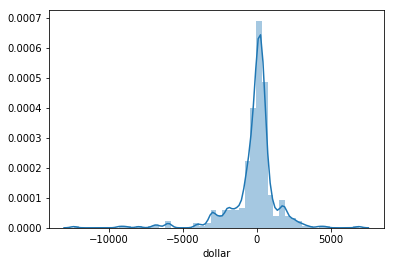

In [34]:
x = data['dollar']
y = data['trade_id']
sns.distplot(x, bins = 50,kde=True)

# print(data)

### 上面這張圖告訴你們獲利的常態分佈，可以知道基本上平台的運作，我們獲利的常態為 0， 95% 的信心水準

In [35]:
# sns.pairplot(data, vars = ['dollar', 'trade_id','datetime'])

C:\Users\breezefay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\breezefay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


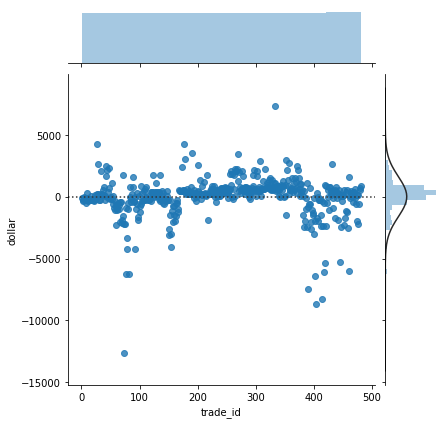

In [36]:
sns.jointplot(x='trade_id',y='dollar',data = data, kind='resid')

### 上面這張圖可以觀察出你們進行多次交易的損益點圖
### 下面那張則是用另外一種圖表呈現

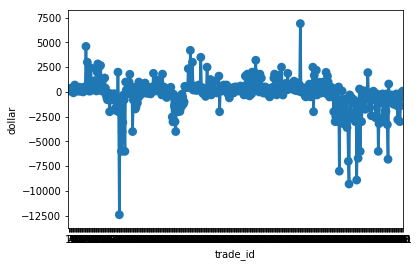

In [37]:
sns.pointplot(x="trade_id",y="dollar",data=data)

C:\Users\breezefay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


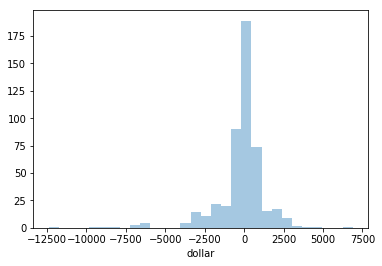

In [38]:
sns.distplot(data['dollar'],kde=False,bins=30)

C:\Users\breezefay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


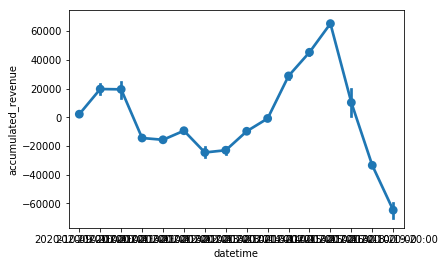

In [39]:
sns.pointplot(x="datetime",y="accumulated_revenue",data=data)

### 這張圖代表著我們總體對平台的損益，我們可以觀察到在最後倒數第四個點是我們累計獲利最高的時段，接下來就被平台坑殺了

C:\Users\breezefay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


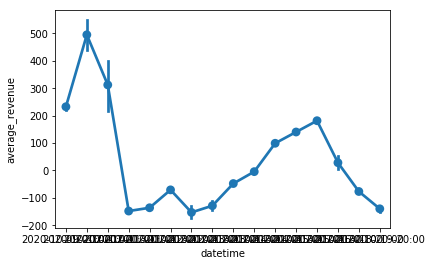

In [40]:
sns.pointplot(x="datetime",y="average_revenue",data=data)

### 這張圖是代表每人平均獲利的時間點圖